# 경사 하강법으로 이미지 복원 

이미지 처리를 위해 만들어 두었던 weired_function() 함수에 실수로 버그가 들어가 100x100 픽셀의 오염된 이미지가 만들어졌다. 오염된 이미지와 weired_function()을 활용해 원본 이미지를 복원해보자. 

In [2]:
import torch 
import pickle
import matplotlib.pyplot as plt

In [9]:
shp_oripinal_img = (100, 100)
broken_image = torch.FloatTensor( pickle.load(open('./broken_image_t.p', 'rb'), encoding ='latin1'))


In [27]:
# pickle 사용 > array형태 
print(pickle.load(open('./broken_image_t.p', 'rb')))
# torch tensor 형태로 변환 
print(broken_image)

[-0.00946443 -0.00041859  0.00943783 ... -0.00143515 -0.00010314
 -0.00358077]
tensor([-0.0095, -0.0004,  0.0094,  ..., -0.0014, -0.0001, -0.0036])


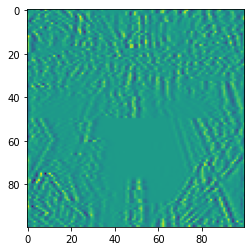

In [28]:
plt.imshow(broken_image.view(100,100)) 

In [7]:
def weird_function(x, n_iter=5):
    h = x    
    filt = torch.tensor([-1./3, 1./3, -1./3])
    for i in range(n_iter):
        zero_tensor = torch.tensor([1.0*0])
        h_l = torch.cat( (zero_tensor, h[:-1]), 0)
        h_r = torch.cat((h[1:], zero_tensor), 0 )
        h = filt[0] * h + filt[2] * h_l + filt[1] * h_r
        if i % 2 == 0:
            h = torch.cat( (h[h.shape[0]//2:],h[:h.shape[0]//2]), 0  )
    return h

# torch.dist : 거리 계산 
def distance_loss(hypothesis, broken_image):
    return torch.dist(hypothesis,broken_image)

In [33]:
# 100 x 100 = 10000개의 텐서 생성 
random_tensor = torch.randn(10000, dtype = torch.float)

random_tensor

tensor([-0.5595, -0.9355,  0.8915,  ..., -0.9253, -1.2608, -0.4836])

In [42]:
lr = 0.8

for i in range(0,20000):
    random_tensor.requires_grad_(True)
    hypothesis = weird_function(random_tensor)
    loss = distance_loss(hypothesis,broken_image)
    loss.backward()
    with torch.no_grad():
        random_tensor = random_tensor - lr*random_tensor.grad
    if i % 1000 == 0:
        print('Loss at {} = {}'.format(i, loss.item()))

Loss at 0 = 12.318114280700684
Loss at 1000 = 1.1719402074813843
Loss at 2000 = 0.563710629940033
Loss at 3000 = 0.3902144134044647
Loss at 4000 = 0.30707839131355286
Loss at 5000 = 0.25630897283554077
Loss at 6000 = 0.22013884782791138
Loss at 7000 = 0.19168098270893097
Loss at 8000 = 0.1677907258272171
Loss at 9000 = 0.1468103975057602
Loss at 10000 = 0.12777255475521088
Loss at 11000 = 0.11007744818925858
Loss at 12000 = 0.09334024786949158
Loss at 13000 = 0.07730813324451447
Loss at 14000 = 0.061812929809093475
Loss at 15000 = 0.046741485595703125
Loss at 16000 = 0.03201879560947418
Loss at 17000 = 0.021141456440091133
Loss at 18000 = 0.02116522379219532
Loss at 19000 = 0.021167315542697906


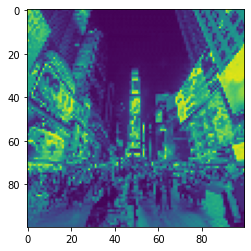

In [48]:
plt.imshow(random_tensor.view(100,100).data)

# 파헤쳐보기 

In [3]:
random_tensor = torch.randn(10000, dtype = torch.float)
random_tensor

tensor([ 0.7268,  1.1566, -1.0648,  ...,  0.6624, -0.6799, -0.5514])

In [4]:
print(random_tensor.grad)

None


In [5]:
# 미분 자동 추적기능 on 
random_tensor.requires_grad_(True)

tensor([ 0.7268,  1.1566, -1.0648,  ...,  0.6624, -0.6799, -0.5514],
       requires_grad=True)

In [10]:
hypothesis = weird_function(random_tensor)
loss = distance_loss(hypothesis,broken_image)
print(loss)
loss.backward()

tensor(12.2873, grad_fn=<DistBackward0>)


In [11]:
random_tensor

tensor([ 0.7268,  1.1566, -1.0648,  ...,  0.6624, -0.6799, -0.5514],
       requires_grad=True)

In [12]:
lr = 0.8 
random_tensor_2 = random_tensor - lr*random_tensor.grad
random_tensor_2

tensor([ 0.7258,  1.1567, -1.0629,  ...,  0.6619, -0.6781, -0.5509],
       grad_fn=<SubBackward0>)

In [13]:
random_tensor.grad

tensor([ 0.0013, -0.0002, -0.0024,  ...,  0.0006, -0.0022, -0.0007])

In [14]:
broken_image

tensor([-0.0095, -0.0004,  0.0094,  ..., -0.0014, -0.0001, -0.0036])